## 1. Loading the data

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
df_X = pd.read_csv('data/Training_Features.csv', index_col="respondent_id")

In [5]:
df_X

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [12]:
df_X.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

**Analysis**: Contains numerical and categorial features

In [6]:
df_y = pd.read_csv('data/Training_Labels.csv', index_col="respondent_id")

In [7]:
df_y

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [16]:
df_y.dtypes

h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

**Analysys**: Binary values

In [17]:
np.testing.assert_array_equal(df_X.index.values, df_y.index.values)

#### Class balance

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()

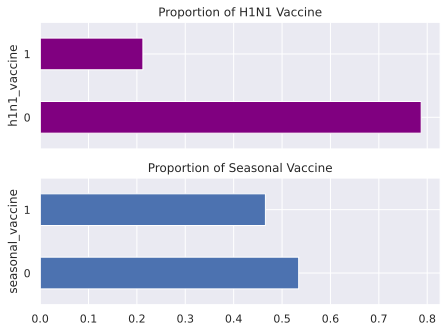

In [54]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = df_y.shape[0]

(df_y['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0], color='purple')
)
ax[0].set_ylabel("h1n1_vaccine")

(df_y['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

**Analysis**: h1n1_vaccine is decently imballanced, while seasonal vaccine is almostly ballanced

In [20]:
pd.crosstab(
    df_y["h1n1_vaccine"], 
    df_y["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [21]:
df_y_modified = df_y.copy()

In [22]:
df_y_modified['class'] = df_y['h1n1_vaccine']

In [23]:
df_y[['h1n1_vaccine', 'seasonal_vaccine']]

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [24]:
(df_y["h1n1_vaccine"]
     .corr(df_y["seasonal_vaccine"], method="pearson")
)

np.float64(0.37714265306144473)

In [25]:
joined_df = df_X.join(df_y)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [26]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


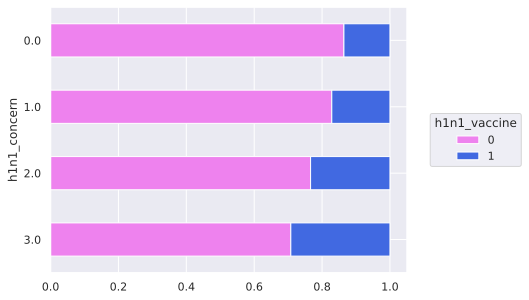

In [92]:
h1n1_concern_counts = counts.sum(axis='columns')
props = counts.div(h1n1_concern_counts, axis='index')
ax = props.plot.barh(stacked=True, color=['violet', 'royalblue'])
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [90]:
def vaccine_plot_rate(col, target, data, ax=None):
    counts = (joined_df[[target, col]].groupby([target, col]).size().unstack(target))
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax,color=['violet', 'royalblue'] )
    ax.invert_yaxis()
    ax.legend().remove()

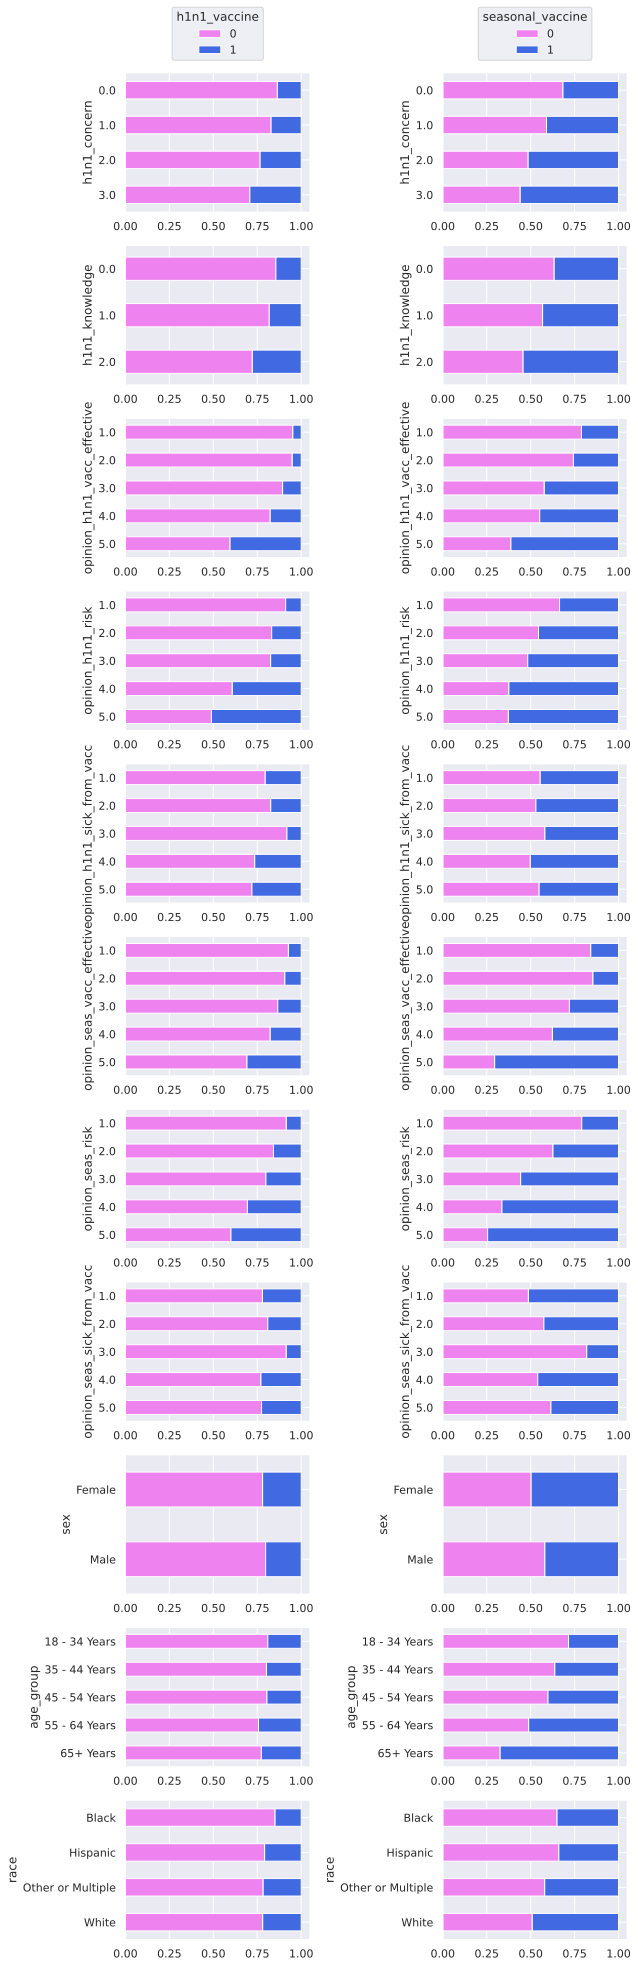

In [91]:
columns_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(columns_to_plot), 2, figsize=(9,len(columns_to_plot)*2.5)
)
for idx, col in enumerate(columns_to_plot):
    vaccine_plot_rate(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccine_plot_rate(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

## 2. Train / Test Spit

In [60]:
# train / test splitting with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df_X,
    df_y,
    test_size=0.2,
    shuffle=True,
    stratify=df_y,
    random_state=14
)

## 3. Preprocessing

In [75]:
numeric_cols = df_X.columns[(df_X.dtypes != "object")].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [76]:
len(df_X.dtypes)

35

In [77]:
order_cols = []
for f in numeric_cols:
    if df_X[f].unique().shape[0] > 3:
        order_cols.append(f)
    

In [78]:
len(order_cols)

10

In [79]:
len(numeric_cols)

23

In [80]:
num_cols = []
for f in numeric_cols:
    if df_X[f].unique().shape[0] <= 3:
        num_cols.append(f)

In [81]:
num_cols

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance']

In [82]:
categorical_cols = df_X.columns[df_X.dtypes == "object"].values
print(categorical_cols)

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [83]:
len(categorical_cols)

12

### Feature preprocessing

In [72]:
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import xgboost

In [84]:
numeric_preprocessing_steps = Pipeline([
    ('simple_imputer', SimpleImputer(strategy="constant", fill_value=0.0))
])  

order_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='mean'))
])  

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocessing_steps , num_cols),
        ("cat", categorical_transformer, categorical_cols),
        ("order", order_preprocessing_steps, order_cols)
    ]
)

# Ridge Regression
clf = XGBClassifier(tree_method="hist", multi_strategy="multi_output_tree")
pipeline = Pipeline([("preprocessor", preprocessor),
            ('classifier', clf)])

### Using GridSearch for Best XGBoost Params Estimation

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [48]:
#parameters = [{'classifier__n_estimators': [100, 200, 300, 400, 500, 700, 900, 1000, 1200], 'classifier__max_depth':[2, 3, 4, 5, 7], 'classifier__learning_rate':[0.001, 0.01, 0.1], 'classifier__subsample':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1], 'classifier_colsample_bytree':[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1]}]
parameters = [{
    'classifier__n_estimators': [200, 400, 500, 700, 1000],
    'classifier__max_depth': [2, 3, 4, 5, 7],
    'classifier__learning_rate': [0.001, 0.01, 0.1],
    'classifier__subsample': [0.3, 0.6, 0.9],
    'classifier__colsample_bytree': [0.3, 0.6, 0.9]
}]

cv = KFold(n_splits=3, random_state=14, shuffle=True)

gsearch1 = GridSearchCV(estimator=pipeline, cv=cv,
                        param_grid=parameters, return_train_score=True, verbose=4)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
[CV 1/3] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.001, classifier__max_depth=2, classifier__n_estimators=200, classifier__subsample=0.3;, score=(train=0.498, test=0.497) total time=   1.3s
[CV 2/3] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.001, classifier__max_depth=2, classifier__n_estimators=200, classifier__subsample=0.3;, score=(train=0.498, test=0.498) total time=   1.4s
[CV 3/3] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.001, classifier__max_depth=2, classifier__n_estimators=200, classifier__subsample=0.3;, score=(train=0.498, test=0.498) total time=   1.4s
[CV 1/3] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.001, classifier__max_depth=2, classifier__n_estimators=200, classifier__subsample=0.6;, score=(train=0.498, test=0.497) total time=   0.8s
[CV 2/3] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.001, 

GridSearchCV(cv=KFold(n_splits=3, random_state=14, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(fill_value=0.0,
                                                                                                        strategy='constant'))]),
                                                                         ['behavioral_antiviral_meds',
                                                                          'behavioral_avoidance',
                                                                          'behavioral_face_mask',
                                                                          'behavioral_wash_hands',
                                                                          'behavioral_large_ga...
                                                      multi_strategy='multi_output_tree',
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid=[{'classifier__colsample_bytree': [0.3, 0.6, 0.9],
                          'classifier__learning_rate': [0.001, 0.01, 0.1],
                          'classifier__max_depth': [2, 3, 4, 5, 7],
                          'classifier__n_estimators': [200, 400, 500, 700,
                                                       1000],
                          'classifier__subsample': [0.3, 0.6, 0.9]}],
             return_train_score=True, verbose=4)

In [64]:
gsearch1.best_params_

NameError: name 'gsearch1' is not defined

In [65]:
%%time
test_preds = gsearch1.predict_proba(X_test)
test_preds

NameError: name 'gsearch1' is not defined

In [66]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": test_preds[:, 0],
        "seasonal_vaccine": test_preds[:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

NameError: name 'test_preds' is not defined

### ROC curves

In [62]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

NameError: name 'y_preds' is not defined

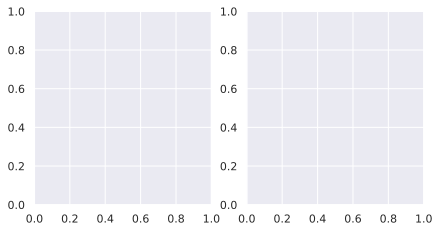

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [53]:
roc_auc_score(y_test, y_preds)

np.float64(0.8688023621687639)

In [ ]:
#BEST FOUND PARAMETERS
{'classifier__learning_rate': 0.01,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 1000,
 'colsample_bytree': 0.6,
 'subsample': 0.3
 }

In [86]:
### TRAIN ON FULL DATASET FOR SUBMISSION

clf = XGBClassifier(tree_method="hist", multi_strategy="multi_output_tree", learning_rate=0.01, max_depth=7, n_estimators=1000, colsample_bytree =0.6, subsample = 0.3)
pipeline = Pipeline([("preprocessor", preprocessor),
            ('classifier', clf)])
pipeline.fit(df_X, df_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0.0,
                                                                                 strategy='constant'))]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None,
                               multi_strategy='multi_output_tree',
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [87]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": test_preds[:, 0],
        "seasonal_vaccine": test_preds[:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

NameError: name 'test_preds' is not defined

NameError: name 'y_preds' is not defined

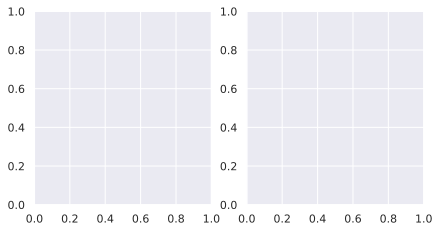

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [57]:
roc_auc_score(y_test, y_preds)

np.float64(0.8688023621687639)

### SUBMISSION

In [58]:
test_features_df = pd.read_csv("data/Test_Features.csv", 
                               index_col="respondent_id")

test_probas = pipeline.predict_proba(test_features_df)
test_probas

array([[0.11591861, 0.21924141],
       [0.03180915, 0.04404749],
       [0.19585617, 0.7037617 ],
       ...,
       [0.18995821, 0.21276498],
       [0.03701309, 0.29559347],
       [0.6049829 , 0.6583157 ]], dtype=float32)

In [59]:
submission_df = pd.read_csv("/data/submission_format.csv", 
                            index_col="respondent_id")

In [60]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [61]:
### FOR MULTILABEL XGBOOST!!!

# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[:, 0]
submission_df["seasonal_vaccine"] = test_probas[:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.115919,0.219241
26708,0.031809,0.044047
26709,0.195856,0.703762
26710,0.665471,0.891616
26711,0.246287,0.446863


In [62]:
submission_df.to_csv('my_submission_final.csv', index=True)

In [ ]:
submission_df